SyntaxError: ignored

In [6]:
#pip install pandas
#pip install requests
#
import requests
import pandas as pd


dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

response = requests.get(dataset_url)

if response.status_code == 200:
    data = response.text
    csv_data = pd.read_csv(dataset_url)
    print(csv_data.head())

    add_row = {"sepal_length":5.1,"sepal_width":3.5,"petal_length":1.4,"petal_width":0.2}
    csv_data.append(add_row,ignore_index=True)

else:
    print("Failed to fetch data.")


   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


<ipython-input-6-483bf51c9fdd>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  csv_data.append(add_row,ignore_index=True)


In [30]:
print(csv_data.describe())



       sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [28]:
print(csv_data.columns)
csv_data = csv_data.rename(columns={'5.1':'sepal_length','3.5':'sepal_width','1.4':'petal_length','0.2':'petal_width','Iris-setosa':'flower_type'})
print(csv_data)

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')
     sepal_length  sepal_width  petal_length  petal_width     flower_type
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]


In [32]:
csv_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
flower_type     0
dtype: int64

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt


sb.countplot(x='flower_type', data=csv_data, )
plt.show()

NameError: ignored

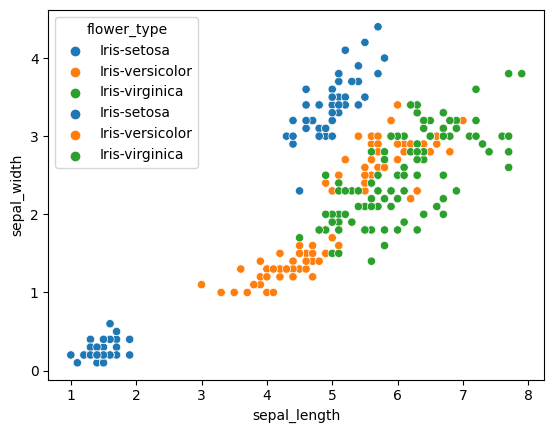

In [48]:
sb.scatterplot(x='sepal_length', y='sepal_width',
                hue='flower_type', data=csv_data, )
sb.scatterplot(x='petal_length', y='petal_width',
                hue='flower_type', data=csv_data, )
plt.show()


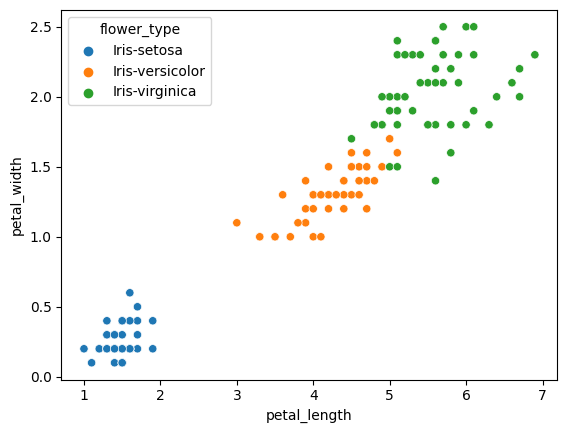

In [46]:
sb.scatterplot(x='petal_length', y='petal_width',
                hue='flower_type', data=csv_data, )
plt.show()

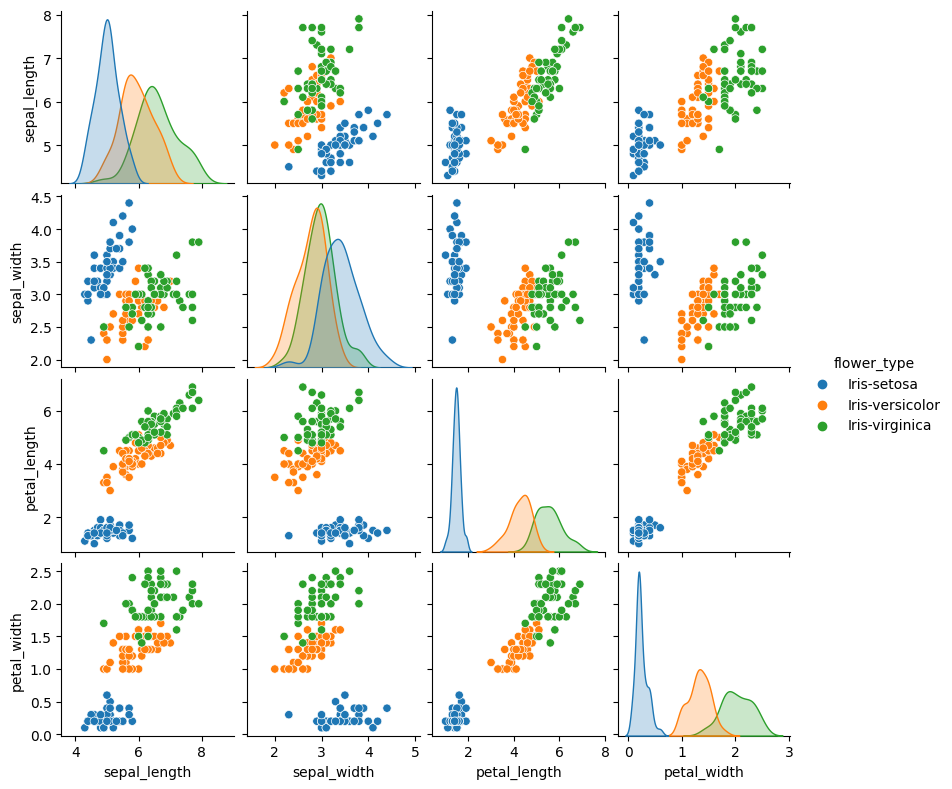

In [53]:

sb.pairplot(csv_data,hue='flower_type', height=4)

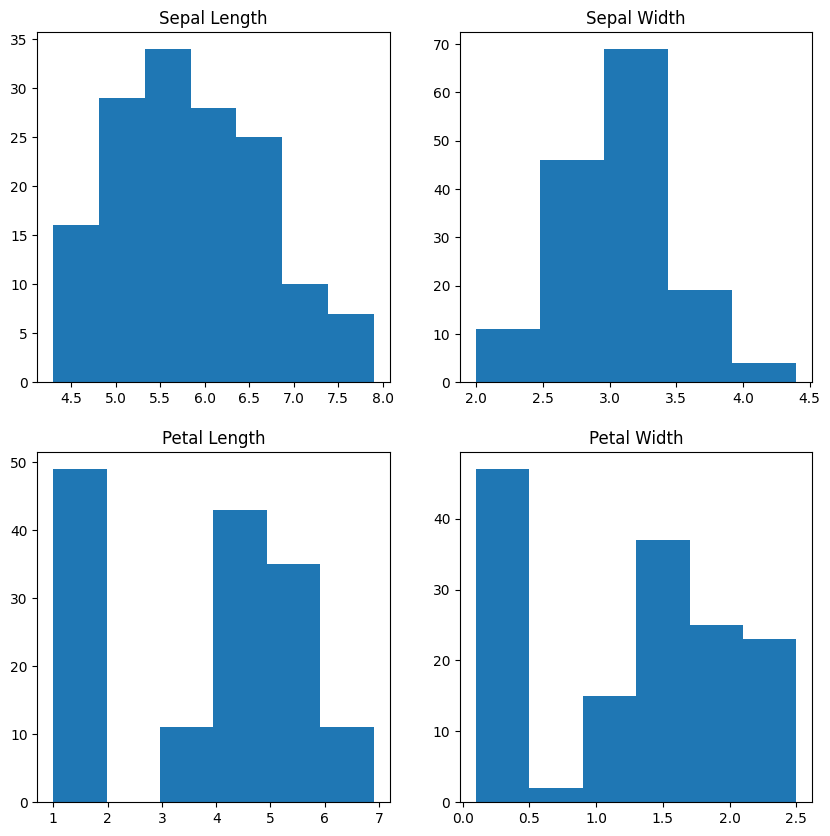

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(csv_data['sepal_length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(csv_data['sepal_width'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(csv_data['petal_length'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(csv_data['petal_width'], bins=6);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

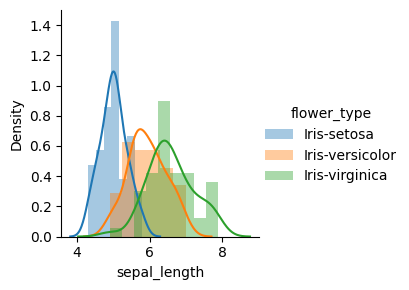

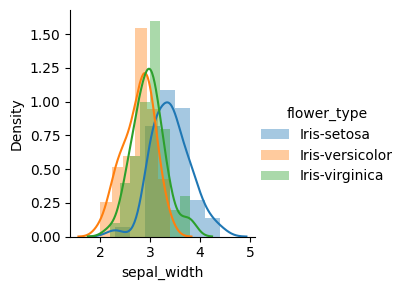

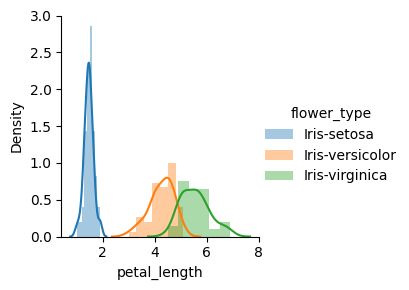

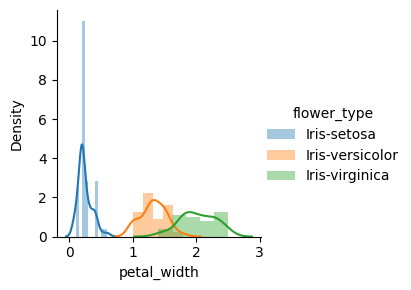

In [56]:
plot = sb.FacetGrid(csv_data, hue="flower_type")
plot.map(sb.distplot, "sepal_length").add_legend()

plot = sb.FacetGrid(csv_data, hue="flower_type")
plot.map(sb.distplot, "sepal_width").add_legend()

plot = sb.FacetGrid(csv_data, hue="flower_type")
plot.map(sb.distplot, "petal_length").add_legend()

plot = sb.FacetGrid(csv_data, hue="flower_type")
plot.map(sb.distplot, "petal_width").add_legend()

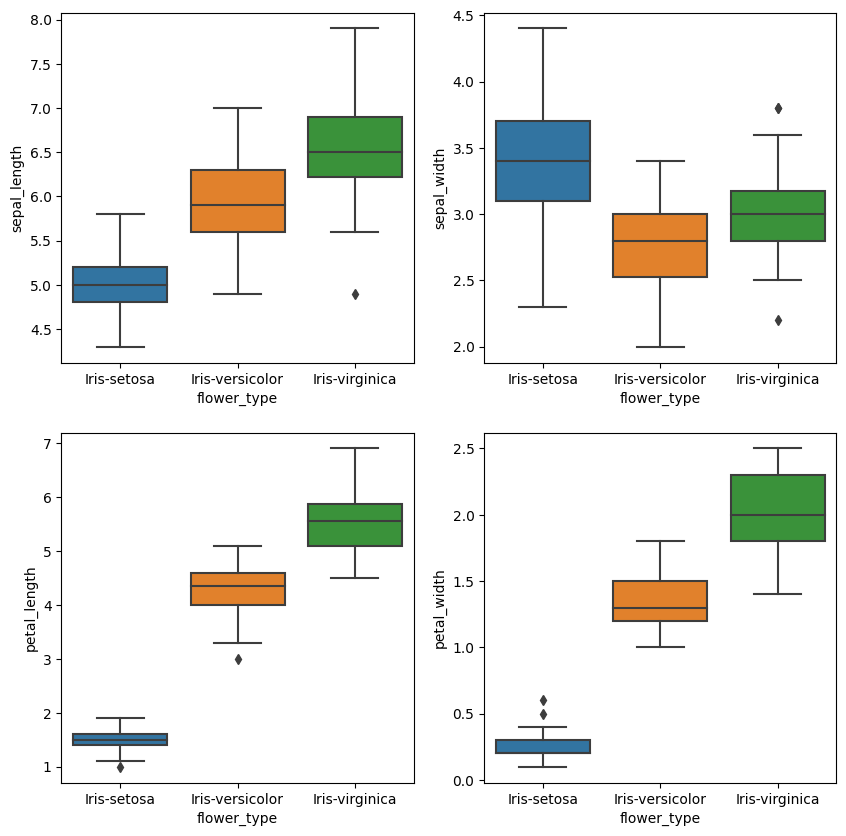

In [60]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sb.boxplot(x="flower_type", y="sepal_length", data=csv_data)

plt.subplot(222)
sb.boxplot(x="flower_type", y="sepal_width", data=csv_data)

plt.subplot(223)
sb.boxplot(x="flower_type", y="petal_length", data=csv_data)

plt.subplot(224)
sb.boxplot(x="flower_type", y="petal_width", data=csv_data)

plt.show()

<ipython-input-7-0b69d97fb248>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(csv_data.corr(method='pearson'),annot = True);


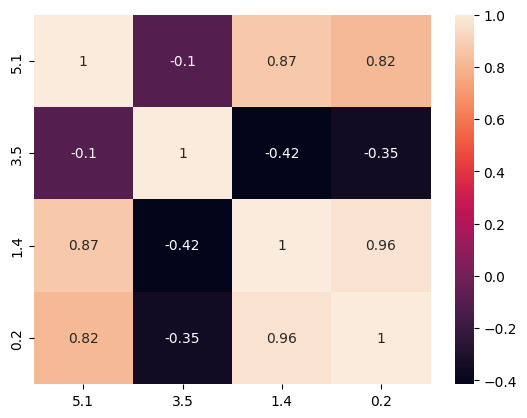

In [7]:
sb.heatmap(csv_data.corr(method='pearson'),annot = True);
plt.show()